#Question 1

weight:  [0.09343213 0.12910025] Bias:  -0.08081753574083009 Accuracy_history:  [0.25, 0.75, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
weight:  [0.15782346 0.10513252] Bias:  -0.04981213934180928 Accuracy_history:  [0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
weight:  [0.59612497 0.52860424] Bias:  -0.28499842636592065 Accuracy_history:  [0.5, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
weight:  [0.48150187 0.26813166] Bias:  -0.20527792127551525 Accuracy_history:  [0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
weight:  [0.87882623 0.96083793] Bias:  -0.6477414093945353 Accuracy_history:  [0.5, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


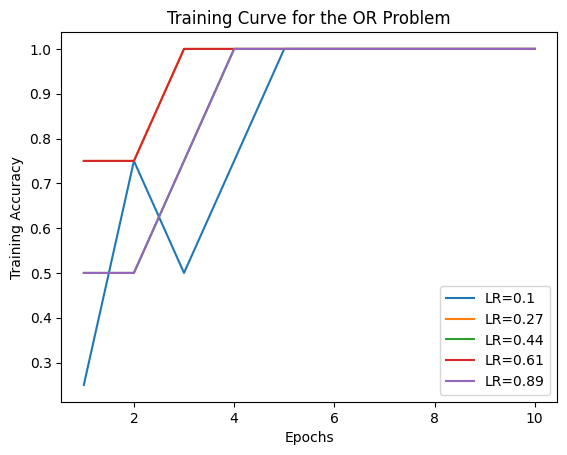

weight:  [0.20415283 0.0977255 ] Bias:  -0.2164830508885309 Accuracy_history:  [0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
weight:  [0.29252812 0.07789452] Bias:  -0.3575852675281068 Accuracy_history:  [0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
weight:  [1.09922656 0.70175122] Bias:  -1.3616620445158778 Accuracy_history:  [0.5, 0.25, 0.5, 0.5, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0]
weight:  [1.1583655  0.51318924] Bias:  -1.312156456907888 Accuracy_history:  [0.75, 0.25, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0]
weight:  [2.04451147 0.81425484] Bias:  -2.540505470712165 Accuracy_history:  [0.5, 0.25, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0]


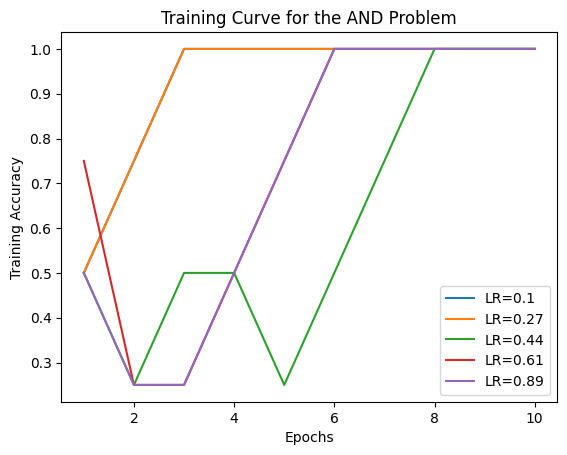

In [8]:
import numpy as np
import matplotlib.pyplot as plt

input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_target = np.array([0, 1, 1, 1])
and_target = np.array([0, 0, 0, 1])

def train_perceptron(input_data, target, learning_rate, num_epochs):
    num_samples, num_features = input_data.shape
    weights = np.random.uniform(-0.3, 0.3, num_features)
    bias = np.random.uniform(-0.3, 0.3)
    accuracy_history = []

    for epoch in range(num_epochs):
        errors = 0
        for i in range(num_samples):
            input_vector = input_data[i]
            target_output = target[i]
            net = np.dot(input_vector, weights) + bias
            predicted_output = 1 if net >= 0 else 0

            error = target_output - predicted_output
            if error != 0:
                errors += 1
                weights += learning_rate * error * input_vector
                bias += learning_rate * error

        accuracy = 1 - (errors / num_samples)
        accuracy_history.append(accuracy)

    return weights, bias, accuracy_history

learning_rates = [0.1, 0.27, 0.44, 0.61, 0.89]
num_epochs = 10

for lr in learning_rates:
    weights, bias, accuracy_history = train_perceptron(input_data, or_target, lr, num_epochs)
    plt.plot(range(1, num_epochs + 1), accuracy_history, label=f'LR={lr}')
    print("weight: ",weights,"Bias: ",bias,"Accuracy_history: ",accuracy_history)

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Curve for the OR Problem')
plt.legend()
plt.show()

for lr in learning_rates:
    weights, bias, accuracy_history = train_perceptron(input_data, and_target, lr, num_epochs)
    plt.plot(range(1, num_epochs + 1), accuracy_history, label=f'LR={lr}')
    print("weight: ",weights,"Bias: ",bias,"Accuracy_history: ",accuracy_history)

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Curve for the AND Problem')
plt.legend()
plt.show()


#Question 2

In [14]:
import numpy as np

np.random.seed(0)
num_samples = 1000
num_features = 5
num_classes = 2

X = np.random.randn(num_samples, num_features)
print(f"Generate random data: \n{X}")
y = np.random.choice([0, 1], size=num_samples)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def feedforward_neural_network(X, weights, biases):
    input_layer = X
    hidden_layer = sigmoid(np.dot(input_layer, weights[0]) + biases[0])
    output_layer = sigmoid(np.dot(hidden_layer, weights[1]) + biases[1])
    return output_layer

input_size = num_features
hidden_size = 9
output_size = num_classes

weights = [np.random.randn(input_size, hidden_size), np.random.randn(hidden_size, output_size)]
biases = [np.zeros(hidden_size), np.zeros(output_size)]

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

output = feedforward_neural_network(X, weights, biases)

y_one_hot = np.zeros((num_samples, num_classes))
y_one_hot[np.arange(num_samples), y] = 1

loss = cross_entropy_loss(y_one_hot, output)
print(f"\n\nCross-Entropy Loss: {loss}")


Generate random data: 
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 ...
 [-1.95191083  2.44121616 -0.01728509  0.91228203  1.2396585 ]
 [-0.5733674   0.42488949 -0.27126002 -0.68356754 -1.53743761]
 [-0.10137443  0.74666572  0.92918181  0.22941801  0.41440588]]


Cross-Entropy Loss: 0.9276391317921309
